# Building the environment

When building an AI, the first thing we always have to do is define the environment. Defining an environment always requires the following three elements:
* Defining the states
* Defining the actions
* Defining the rewards
These three elements have already been defined in the previous chapter on Q-learning, but let's quickly remind ourselves what they are.

## The states

The state, at a specific time t, is the location where the robot is at that time t. However, remember, you have to encode the location names so that our AI can do the math.

At the risk of disappointing you, given all the crazy hype about AI, let's remain realistic and understand that Q-learning is nothing more than a bunch of math equations; just like any other AI model. Let's make the encoding integers start at 0, simply because indexes in Python start at 0:

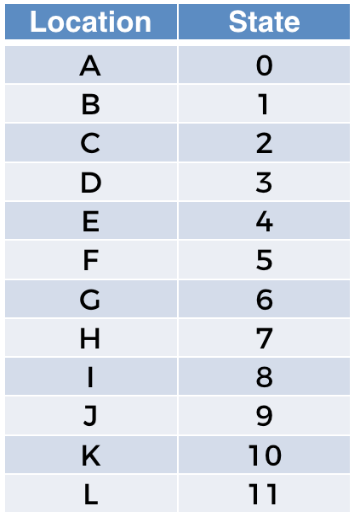

## The actions

The actions are the next possible destinations to which the robot can go. You can encode these destinations with the same indexes as the states. Hence, the total list of actions that the AI can perform is the following:

In [82]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

## The rewards

Remember, when in a specific location, there are some actions that the robot cannot perform. For example, if the robot is in location J, it can perform the actions 5, 8, and 10, but it cannot perform the other actions. You can specify that by attributing a reward of 0 to the actions it cannot perform, and a reward of 1 to the actions it can perform.
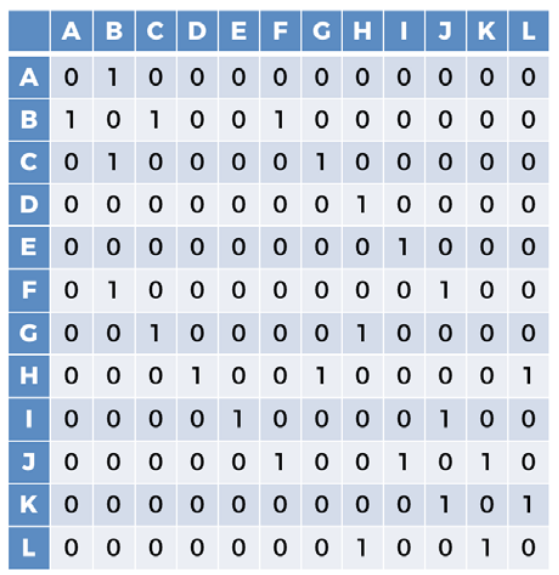

## AI solutions refresher

It never hurts to get a little refresher of a model before implementing it! Let's remind ourselves of the steps of the Q-learning process; this time, adapting it to your new problem. Let's welcome Q-learning back on stage:

### Initialization (first iteration)

For all pairs of states *s* and actions *a*, the Q-values are initialized to 0:

For all states $s=0,\dots,11$ and actions $a = 0,\dots,11:Q(s,a)=0$

### Next iterations

At each iteration $t \geq 1$, the AI will repeat the following steps.

1. It selects a random state $t_s$ from the possible states:
\begin{equation}
s_t = random(0,1,2,3,4,5,6,7,8,9,10,11)
\end{equation}
2. It performs a random action ta that can lead to a next possible state, that is, such that R(s_a,a_t) > 0:
3. It reaches the next state $s_{t+1}$ and gets the reward $R(s_t,a_t)$
4. It computes the temporal difference $TD_t(s_t,a_t)$:
\begin{equation}
TD_t(s_a,a_t)=R(s_t,a_t)+\gamma\max_a(Q(s_{t+1},a))-Q(s_t,a_t)
\end{equation}
5. It updates the Q-values by applying the Bellman equation:
\begin{equation}
Q_t(s_t,a_t) = Q_{t-1}(s_t,a_t)+\alpha TD_t(s_t,a_t)
\end{equation}

We repeat these steps over 1,000 iterations. Why 1,000? The choice of 1,000 comes from my experimentation with this particular environment. I chose a number that's large enough for the Q-values to converge over the training. 100 wasn't large enough, but 1,000 was. Usually, you can just pick a very large number, for example, 5,000, and you will get convergence (that is, the Q-values will no longer update). However, that depends on the complexity of the problem. If you are dealing with a much more complex environment, for example, if you had hundreds of locations in the warehouse, you'd need a much higher number of training iterations. That's the whole process. Now, you're going to implement it in Python from scratch! Are you ready? Let's do this.

# Implementation

Alright, let's smash this. But first, try to smash this yourself without me. Of course, this is a journey we'll take together, but I really don't mind if you take some steps ahead of me. The faster you become independent in AI, the sooner you'll do wonders with it. Try to implement the Q-learning process mentioned previously, exactly as it is. It's okay if you don't implement everything; what matters is that you try.

That's enough coaching; no matter how successful you were, let's go through the solution.

First, start by importing the libraries that you'll use in this implementation. There's only one needed this time: the numpy library, which offers a practical way of working with arrays and mathematical operations. Give it the shortcut np.


In [83]:
import numpy as np

Then, set the parameters of your model. These include the discount factor γ and the learning rate 𝛼, which are the only parameters of the Q-learning model. Give them the values of 0.75 and 0.9 respectively, which I've arbitrarily picked but are usually a good choice. These are decent values to start with if you don't know what to use. However, you'll get the same result with similar values.

In [84]:
gamma = 0.75
alpha = 0.9

The two previous code sections were simply the introductory sections, before you really start to build your AI model. The next step is to start the first part of our implementation.

Try to remember what you have to do now, as a first general step of building an AI.

You build the environment! I just wanted to highlight that, once again; it's really compulsory. The environment will be the first part of your code:

## Part 1 – Building the environment

Let's look at the whole structure of this implementation so that you can take a step back already. Your code will be structured in three parts:
* Part 1 – Building the environment
* Part 2 – Building the AI solution with Q-learning (training)
* Part 3 – Going into production (inference)

### PART 1 - BUILDING THE ENVIRONMENT

#### Defining the states

In [85]:
location_to_state = {
  'A': 0,
  'B': 1,
  'C': 2,
  'D': 3,
  'E': 4,
  'F': 5,
  'G': 6,
  'H': 7,
  'I': 8,
  'J': 9,
  'K': 10,
  'L': 11,
}

location_to_state['A']

0

#### Definindo the actions

In [86]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

#### Defininf the rewards

In [87]:
R = np.array([
[0,1,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0],
[0,0,1,0,0,0,1000,1,0,0,0,0],
[0,0,0,1,0,0,1,0,0,0,0,1],
[0,0,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,1,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,1,0,0,1,0]])

### Part 2 – Building the AI Solution with Q-learning

First, initialize all the Q-values by creating your matrix of Q-values full of 0s, in which the rows correspond to the current states $s_t$, the columns correspond to the actions $a_t$ leading to the next state $s_{t+1}$ , and the cells contain the Q-values $𝑄(𝑠_t,𝑎_𝑡)$.

#### Initializing the Q-values

In [88]:
Q = np.array(np.zeros([12,12]))

Then implement the Q-learning process with a for loop over 1,000 iterations,
repeating the exact same steps of the Q-learning process 1,000 times.

At each iteration $t \geq 1$, the AI will repeat the following steps.

1. It selects a random state $t_s$ from the possible states:
\begin{equation}
s_t = random(0,1,2,3,4,5,6,7,8,9,10,11)
\end{equation}
2. It performs a random action ta that can lead to a next possible state, that is, such that R(s_a,a_t) > 0:
3. It reaches the next state $s_{t+1}$ and gets the reward $R(s_t,a_t)$
4. It computes the temporal difference $TD_t(s_t,a_t)$:
\begin{equation}
TD_t(s_a,a_t)=R(s_t,a_t)+\gamma\max_a(Q(s_{t+1},a))-Q(s_t,a_t)
\end{equation}
5. It updates the Q-values by applying the Bellman equation:
\begin{equation}
Q_t(s_t,a_t) = Q_{t-1}(s_t,a_t)+\alpha TD_t(s_t,a_t)
\end{equation}

In [89]:
for i in range(1000):
  current_state = np.random.randint(0,12)
  playable_actions = []
  for j in range(12):
    if R[current_state, j] > 0:
      playable_actions.append(j)
  next_state = np.random.choice(playable_actions)
  TD = R[current_state, next_state] + gamma + Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
  Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD

Now you've reached the first really exciting step of the journey. You're actually ready to launch the Q-learning process and get your final Q-values. Execute the whole code you've implemented so far, and visualize the Q-values with the following simple print statements:

In [90]:
print(Q.astype(int))

[[    0 25716     0     0     0     0     0     0     0     0     0     0]
 [25452     0 26009     0     0 24169     0     0     0     0     0     0]
 [    0 23031     0     0     0     0 26118     0     0     0     0     0]
 [    0     0     0     0     0     0     0 26119     0     0     0     0]
 [    0     0     0     0     0     0     0     0 24147     0     0     0]
 [    0 23058     0     0     0     0     0     0     0 24770     0     0]
 [    0     0 25219     0     0     0 27026 26027     0     0     0     0]
 [    0     0     0 25130     0     0 26126     0     0     0     0 24875]
 [    0     0     0     0 23512     0     0     0     0 24151     0     0]
 [    0     0     0     0     0 22999     0     0 23562     0 25112     0]
 [    0     0     0     0     0     0     0     0     0 25086     0 25141]
 [    0     0     0     0     0     0     0 25173     0     0 21749     0]]


### Part 3 – Going into production

In this part, you'll compute the optimal path from any starting location to any ending top priority location. The idea here is to implement a route function, that takes as inputs a starting location and an ending location and that returns as output the shortest route inside a Python list.

The starting location corresponds to wherever our autonomous warehouse robot is at a given time, and the ending location corresponds to where the robot has to go as a top priority. Since you'll want to input the locations with their names (in letters), as opposed to their states (in indexes), you'll need a dictionary that maps the location states (in indexes) to the location names (in letters). That's the first thing to do here in this third part, using a trick to invert your previous dictionary, location_to_state, since you simply want to get the exact inverse mapping from this dictionary:

#### Making a mapping from the states to the locations

In [92]:
state_to_location = {state: location for location, state in location_to_state.items()}
state_to_location

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L'}

Your robot is going to go from location E to location G. Here's the explanation of exactly how it does that—I'll enumerate the different steps of the process. Follow along on the matrix of Q-values as I explain:

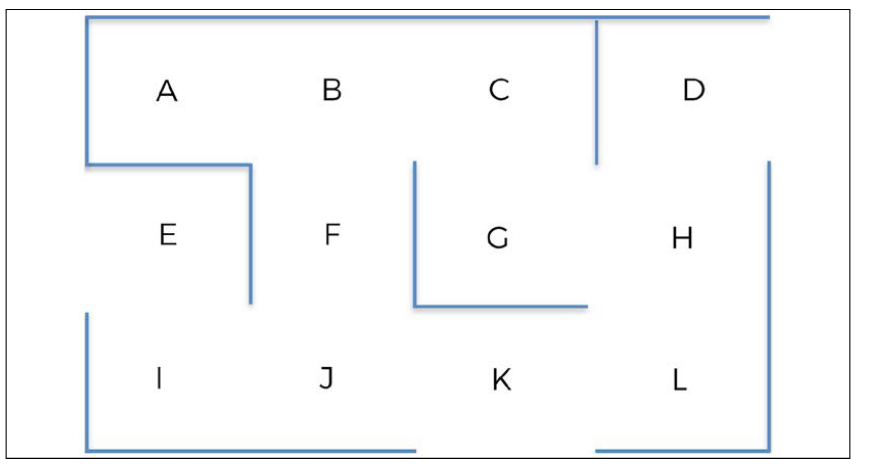

* 1. The AI starts at the starting location **E**.
* 2. The AI gets the state of location E, which according to your *location_to_ state* mapping is $s_0 = 4$.
* 3. On the row of index $s_0 = 4$ in our matrix of Q-values, the AI chooses the column that has the maximum Q-value (703).
* 4. This column has index 8, so the AI performs the action of index 8, which leads it to the next state $s_{t+1} = 8$.
* 5. The AI gets the location of state 8, which according to our *state_to_location* mapping is location I. Since the next location is location I, I is appended to the AI's list containing the optimal path.
* 6. Then, starting from the new location I, the AI repeats the same previous five steps until it reaches our final destination, location G.

That's it! That's exactly what you have to implement. You have to generalize this to any starting and ending locations, and the best way to do that is through a function taking two inputs:

* 1. starting_location: The location at which the AI starts
* 2. ending_location: The top priority location to which it has to go and returning the optimal route. Since we're talking about a route, you can call that function route().

An important thing to understand inside this route() function is that since you don't know how many locations the AI will have to go through between the starting and ending locations, you have to make a while loop which will repeat the 5-step process described previously, and that will stop as soon as it reaches the top priority end location.

#### Making the final function that will return the optimal route

In [111]:
def route(starting_location, ending_location):
  R_new = np.copy(R)
  ending_state = location_to_state[ending_location]
  R_new[ending_state, ending_state] = 1000
  Q = np.array(np.zeros([12,12]))
  for i in range(1000):
      current_state = np.random.randint(0,12)
      playable_actions = []
      for j in range(12):
          if R_new[current_state, j] > 0:
              playable_actions.append(j)
      next_state = np.random.choice(playable_actions)
      TD = R_new[current_state, next_state] + gamma * Q[next_state,
      np.argmax(Q[next_state,])] - Q[current_state, next_state]
      Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
  route = [starting_location]
  next_location = starting_location
  while (next_location != ending_location):
      starting_state = location_to_state[starting_location]
      next_state = np.argmax(Q[starting_state,])
      next_location = state_to_location[next_state]
      route.append(next_location)
      starting_location = next_location
  return route

Congratulations! Your AI is now ready. Not only does it have the training process implemented, but also the code to run in inference mode. The only thing that's not great so far is that you still have to manually update the matrix of rewards; but no worries, we'll get to that later on. Before we get to that, let's first check that you have an intermediary victory here, and then we can get to work on improvements.

In [117]:

route("G", "E")

['G', 'H', 'L', 'K', 'J', 'I', 'E']

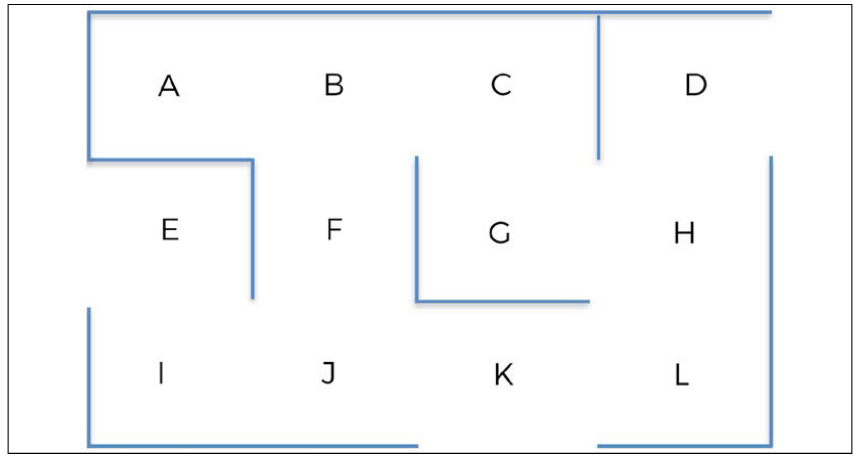

### Teste diversas rotas

### Improvement 1 – Automating reward attribution

* **Step 1**: Go back to the original matrix of rewards, as it was before with only 1s and 0s. Part 1 of the code becomes the following, and will be included in the final code:

#### Defining the rewards

In [106]:
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

* **Step 2**: Step 2: In part 2 of the code, make a copy (call it R_new) of your rewards matrix, inside which the route() function can automatically update the reward in the cell of the ending location.

* **Step 3:** You must include the whole Q-learning algorithm (including the initialization step) inside the route() function,

#### Making a function that returns the shortest route from a starting to ending location

#### Printing the final route


# Improvement 2 – Adding an intermediate goal

Now, let's tackle the second improvement. There are three possible solutions to the problem of adding the option to go by the intermediate location K, the second top priority location. When you see them, you'll understand what I meant when I told you that everything in Reinforcement Learning works by the rewards.

**Solution 1:** Give a high reward to the action leading from location J to location K. This high reward must be larger than 1, and below 1,000. It must be larger than 1 so that the Q-learning process favors the action leading from J to K, as opposed to the action leading from J to F, which has a reward of 1. It must also be below 1,000 so that the highest reward stays on the top priority location, to make sure the AI ends up there. For example, in your rewards matrix you can give a high reward of 500 to the cell in the row of index 9 and the column of index 10, since that cell corresponds to the action leading from location J (state index 9) to location K (state index 10). That way, your AI robot will always go by location K when going from location E to location G. Here's how the matrix of rewards would look in that case:

**Solution 2:** Give a bad reward to the action leading from location J to location F. This bad reward just has to be below 0. By punishing this action with a bad reward, the Q-learning process will never favor the action leading from J to F. For example, in your rewards matrix, you can give a bad reward of -500 to the cell in the row of index 9 and the column of index 5, since that cell corresponds to the action leading from location J (state index 9) to location F (state index 5). That way, your autonomous warehouse robot will never go from location J to location F on its way to location G. Here's how the matrix of rewards would look in that case:

**Solution 3:** Make an additional best_route() function, taking as inputs the three starting, intermediary, and ending locations, which will call your previous route() function twice; the first time from the starting location to the intermediary location, and a second time from the intermediary location to the ending location.